<a href="https://colab.research.google.com/github/elilaird/Stats202-FinalProject/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries and accessing file location

In [2]:

import pandas as pd
import matplotlib as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### Importing Files and combine Study A-E (dropping LeadStatus so we can append StudyE) 

In [3]:
study_A = pd.read_csv("/content/drive/My Drive/Stats202_FinalProject/Data/Study_A.csv")
study_B = pd.read_csv("/content/drive/My Drive/Stats202_FinalProject/Data/Study_B.csv")
study_C = pd.read_csv("/content/drive/My Drive/Stats202_FinalProject/Data/Study_C.csv")
study_D = pd.read_csv("/content/drive/My Drive/Stats202_FinalProject/Data/Study_D.csv")
study_E = pd.read_csv("/content/drive/My Drive/Stats202_FinalProject/Data/Study_E.csv")


#merge datasets
full_set = pd.concat([study_A, study_B, study_C, study_D])
full_set.drop("LeadStatus", axis=1, inplace = True) 
full_set = pd.concat([full_set, study_E])
full_set = full_set.reset_index(drop=True)

full_set.shape

(22909, 39)

### Analyzing Data

In [4]:

full_set.describe()

,PatientID,SiteID,RaterID,AssessmentiD,VisitDay,P1,P2,P3,P4,P5,P6,P7,N1,N2,N3,N4,N5,N6,N7,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13,G14,G15,G16,PANSS_Total
count,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000,22909.000000
mean,30633.481208,60224.140993,90382.462526,305387.675062,89.957571,2.958663,2.673054,2.505347,1.845694,1.786590,2.914881,1.712733,2.980925,3.037627,2.508796,3.069536,3.258632,2.584705,2.408573,1.928543,2.343359,1.555284,2.008774,1.917412,1.936401,2.058711,1.733511,2.599371,1.849972,2.386049,3.207735,2.459252,1.803047,2.426383,2.652538,71.112096
std,9883.579593,19728.216854,29596.641078,98758.258590,92.961899,1.404361,1.235907,1.542917,1.021156,1.155185,1.364604,0.963732,1.050719,1.017903,1.052852,1.085570,1.170407,1.114081,1.067843,1.054935,1.222303,0.924258,1.027967,0.990565,1.106837,0.995845,0.970224,1.295366,0.978540,1.033906,1.211673,1.058141,0.972589,1.116864,1.185041,18.908947
min,10001.000000,20001.000000,30001.000000,100001.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000
25%,30163.000000,60016.000000,90039.000000,301440.000000,15.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,58.000000
50%,30865.000000,60101.000000,90230.000000,307167.000000,67.000000,3.000000,3.000000,2.000000,1.000000,1.000000,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,3.000000,3.000000,1.000000,2.000000,3.000000,69.000000
75%,31529.000000,60187.000000,90407.000000,312894.000000,129.000000,4.000000,3.000000,4.000000,3.000000,2.000000,4.000000,2.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,84.000000
max,50513.000000,100061.000000,150139.000000,502370.000000,480.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,166.000000


In [5]:
full_set.nunique()

Study               5
Country            29
PatientID        2947
SiteID            345
RaterID           776
AssessmentiD    22909
TxGroup             2
VisitDay          445
P1                  7
P2                  7
P3                  7
P4                  7
P5                  7
P6                  7
P7                  7
N1                  7
N2                  7
N3                  7
N4                  7
N5                  7
N6                  7
N7                  7
G1                  7
G2                  7
G3                  6
G4                  7
G5                  7
G6                  7
G7                  7
G8                  7
G9                  7
G10                 7
G11                 7
G12                 7
G13                 7
G14                 7
G15                 7
G16                 7
PANSS_Total       115
dtype: int64

### Calculating Total Positive, Negative and General Scores

In [0]:
#add columns for sums of Positive, Negative, General Symptoms
full_set['Total_P'] = full_set['P1'] + full_set['P2'] +full_set['P3'] + full_set['P4'] + full_set['P5'] + full_set['P6'] + full_set['P7']
full_set['Total_N'] = full_set['N1'] + full_set['N2'] +full_set['N3'] + full_set['N4'] + full_set['N5'] + full_set['N6'] + full_set['N7']
full_set['Total_G'] = full_set['G1'] + full_set['G2'] +full_set['G3'] + full_set['G4'] + full_set['G5'] + full_set['G6'] + full_set['G7'] + full_set['G8'] + full_set['G9'] +full_set['G10'] + full_set['G11'] + full_set['G12'] + full_set['G13'] + full_set['G14'] + full_set['G15'] + full_set['G16']

In [7]:
full_set.head()


,Study,Country,PatientID,SiteID,RaterID,AssessmentiD,TxGroup,VisitDay,P1,P2,P3,P4,P5,P6,P7,N1,N2,N3,N4,N5,N6,N7,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13,G14,G15,G16,PANSS_Total,Total_P,Total_N,Total_G
0,A,USA,10001,20035,30076,100679,Control,0,5,5,5,3,4,5,3,4,4,3,4,4,3,2,3,4,4,4,1,4,1,3,5,3,3,4,3,3,3,5,107,30,24,53
1,A,USA,10001,20035,30076,101017,Control,11,5,5,5,3,4,5,3,4,4,3,4,4,3,3,4,4,4,4,1,4,1,3,5,3,3,4,3,3,3,5,109,30,25,54
2,A,USA,10001,20035,30076,102177,Control,18,4,4,4,3,2,4,2,4,4,3,4,4,3,2,3,3,3,3,1,4,2,2,4,2,2,3,3,2,3,4,91,23,24,44
3,A,USA,10001,20035,30076,101533,Control,25,3,3,3,2,2,4,2,4,4,2,4,4,2,2,3,3,2,2,1,2,2,2,3,2,2,3,3,2,3,4,80,19,22,39
4,A,USA,10001,20035,30076,100930,Control,39,3,3,4,2,1,4,2,4,4,2,4,4,1,2,3,3,1,2,1,1,2,2,3,2,2,3,3,2,3,4,77,19,21,37


###Dropping irrelevant columns

In [0]:
#create new dataset with just the labels
combined = full_set.drop(['P1','P2','P3','P4','P5','P6','P7','N1','N2','N3','N4','N5','N6','N7','G1','G2','G3','G4','G5','G6','G7','G8','G9','G10','G11','G12','G13','G14','G15','G16', 'AssessmentiD', 'Study'], axis=1)


In [9]:
combined.head()

,Country,PatientID,SiteID,RaterID,TxGroup,VisitDay,PANSS_Total,Total_P,Total_N,Total_G
0,USA,10001,20035,30076,Control,0,107,30,24,53
1,USA,10001,20035,30076,Control,11,109,30,25,54
2,USA,10001,20035,30076,Control,18,91,23,24,44
3,USA,10001,20035,30076,Control,25,80,19,22,39
4,USA,10001,20035,30076,Control,39,77,19,21,37


In [0]:
# Creating DataFrame for Day0
import numpy as np
day0 = combined[combined["VisitDay"] == 0]
day0
duplicates = day0.groupby("PatientID").PatientID.count()>1
invalid_ids = duplicates[duplicates == True]
remove_ids = invalid_ids.index.values.astype(int)
remove_list = list(remove_ids)

####We found some duplicate patients who had 2 assignments on day 0. Since the situation is not clearly defined, we decided to drop all patients from our clustering which appear twice or more on day0. Afterwards we tried different combinations of attributes but decided that we get the clearest clusters when we drop every column besides the score

In [0]:
day0 = day0[~day0["PatientID"].isin(remove_list)]
day0 = day0.drop(["PatientID", "Country", "SiteID", "RaterID", "TxGroup", "VisitDay"], axis = 1)


In [12]:
day0.to_excel('/content/drive/My Drive/Stats202_FinalProject/Figures/day0_assessments.xlsx')
day0.head()

,PANSS_Total,Total_P,Total_N,Total_G
0,107,30,24,53
7,85,26,19,40
10,97,29,23,45
16,95,26,27,42
24,98,26,24,48


### After we know which patient data we want to cluster on, we scale the data

In [13]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
mms = MinMaxScaler()
mms.fit(day0)
data_transformed = mms.transform(day0)
data_transformed


array([[0.7047619 , 0.71875   , 0.48571429, 0.66071429],
       [0.4952381 , 0.59375   , 0.34285714, 0.42857143],
       [0.60952381, 0.6875    , 0.45714286, 0.51785714],
       ...,
       [0.23809524, 0.21875   , 0.25714286, 0.21428571],
       [0.5047619 , 0.25      , 0.6       , 0.48214286],
       [0.1047619 , 0.        , 0.2       , 0.125     ]])

###We try hierarchical clustering with ward and complete linkage, and in addition we try K-means


### Hierarchical Clustering with complete linkage seems to work best for three clusters, while if we use the ward linkage criterion, 2 clusters seem to be favorite. 

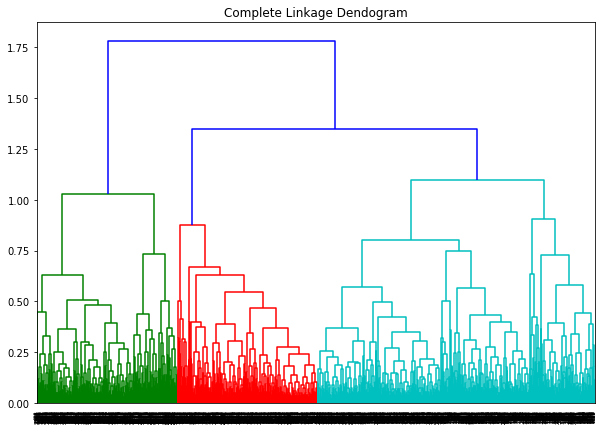

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Complete Linkage Dendogram")
dend = shc.dendrogram(shc.linkage(data_transformed, method='complete'))
plt.savefig('/content/drive/My Drive/Stats202_FinalProject/Figures/complete_linkage.png')

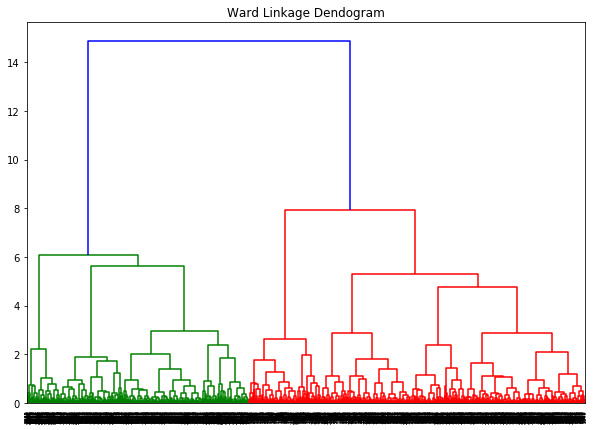

In [15]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Ward Linkage Dendogram")
dend = shc.dendrogram(shc.linkage(data_transformed, method='ward'))
plt.savefig('/content/drive/My Drive/Stats202_FinalProject/Figures/ward_linkage.png')

### If we plot the data and have a look at the clustering with the total positive score and the total negative scores on the axes, we can see that the green cluster puts all the patients with a low positive score together, while the red cluster consists of high positive scores but low negative scores. The blue cluster combines all patients with higher scores

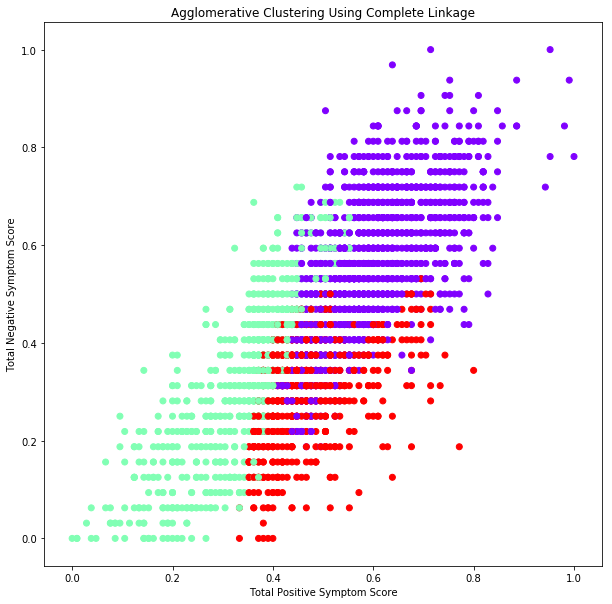

In [16]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
cluster.fit_predict(data_transformed)


plt.figure(figsize=(10, 10))
plt.scatter(data_transformed[:,0], data_transformed[:,1], c=cluster.labels_, cmap='rainbow')
plt.xlabel("Total Positive Symptom Score")
plt.ylabel("Total Negative Symptom Score")
plt.title("Agglomerative Clustering Using Complete Linkage")
plt.savefig('/content/drive/My Drive/Stats202_FinalProject/Figures/agglomerative_clustering_complete.png')

## For ward linkage with two clusters we can see that the red cluster combines patients with low scores while the blue cluster combines patients with high scores

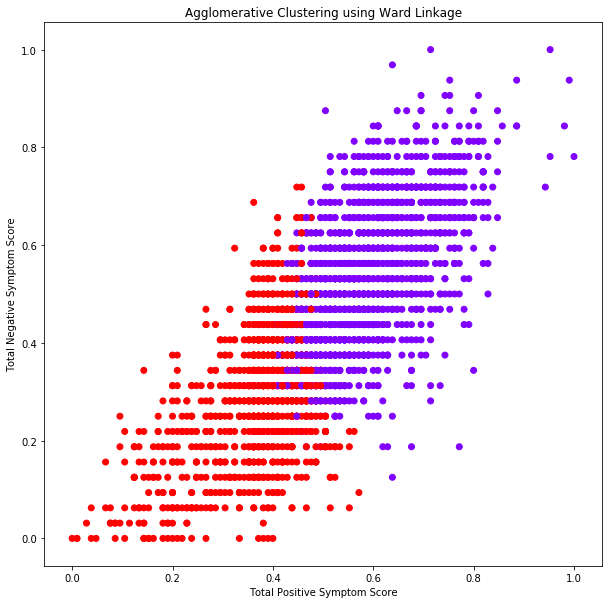

In [17]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_transformed)


plt.figure(figsize=(10, 10))
plt.scatter(data_transformed[:,0], data_transformed[:,1], c=cluster.labels_, cmap='rainbow')
plt.xlabel("Total Positive Symptom Score")
plt.ylabel("Total Negative Symptom Score")
plt.title("Agglomerative Clustering using Ward Linkage")
plt.savefig('/content/drive/My Drive/Stats202_FinalProject/Figures/agglomerative_clustering_ward.png')

### most sense makes K-mean clustering though, where we can split the data in 4 clear clusters. The yellow cluster combines patients with low scores in general, the red one combines patients with low negative but high positive scores, the blue one combines patients with high negative and low positive scores while the turquoise cluster combines all high score patients. This clustering method seems to be the best since it can distinguish the patients into more clusters. 

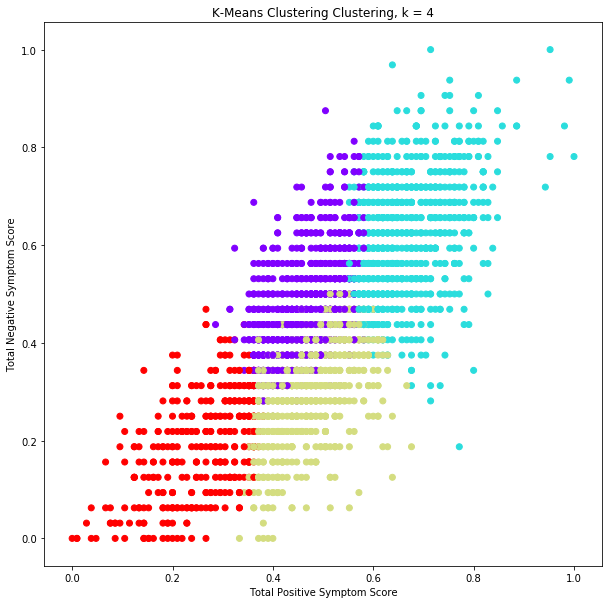

In [19]:
# K-Means Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(data_transformed)
y_kmeans = kmeans.predict(data_transformed)

plt.figure(figsize=(10, 10))
plt.scatter(data_transformed[:,0], data_transformed[:,1], c=y_kmeans, cmap='rainbow')
plt.xlabel("Total Positive Symptom Score")
plt.ylabel("Total Negative Symptom Score")
plt.title("K-Means Clustering Clustering, k = 4")
plt.savefig('/content/drive/My Drive/Stats202_FinalProject/Figures/kmeans_clustering.png')